In [11]:
# Take the input date, and turn it into a list
monthdaycount = [31,28,31,30,31,30,31,31,30,31,30,31]
leapmonthdaycount = [31,29,31,30,31,30,31,31,30,31,30,31]

# REMEMBER 2020 WAS A LEAP YEAR, IDIOT
# Start date is 4-12-2020
def dateCounter(date):
    dateCount = 0
    arrdate = [int(i) for i in date.split('-')]
    if arrdate[2]>2020:
        dateCount+=(arrdate[2]-2020)*366
        # 366 at least have passed since 1-1-2020, so add that here, its a leap year
    for i in range(arrdate[0]-1):
        dateCount+=monthdaycount[i]
    dateCount+=arrdate[1]
    return dateCount
# Curreny objective, get days since Jan 1st 2020
# DOESNT WORK WITH LEAP YEARS
def dateCounterReverse(dateCount):
    arrDate=[1,1,2020]
    activeMonths = []
    if dateCount>366:
        dateCount-=366
        arrDate[2]+=1
        # 366 at least have passed since 1-1-2020, so add that here, its a leap year
    if(arrDate[2]%4==0):
        activeMonths = leapmonthdaycount
        
    else:
        activeMonths = monthdaycount
    for i in range(len(activeMonths)-1):

        if(dateCount-activeMonths[arrDate[0]-1]>0):
            dateCount-=activeMonths[arrDate[0]-1]
            # print("the max day for month " + str(i) + " is " + str(activeMonths[arrDate[0]-1]))
            arrDate[0]+=1
        # Error here in month day counting, this was iterating through i, even when you couldn't subtract the given month's number of days, use the month number stored in the arrDate cause that's the current month
            # If the date can be subtracted from a given month, do so
    arrDate[1]+=dateCount-1
    for j in range(len(arrDate)):
        # if len(str(arrDate[j-1]))<=1:
        #     arrDate[j-1] = '0'+ str(arrDate[j-1])
        # else:
        arrDate[j-1] = str(arrDate[j-1])
    return arrDate
# Curreny objective Takes the number of days since a given event, and returns the date it occured
# DOESNT WORK WITH LEAP YEARS, OR FOR 2022,EXPIRES 1-1-2022


# Date Counting Functions
## Introduction
* One of the most important ways to look through a given set of data to analyze it, is to have some way to iterate through your data. The largest issues with counting with days is that dates are often deliniated in a non-base 10 format, meaning there needs to be some sort of method for translating a given date, into a base 10 number.
## Input Converter
* The best way I could find to convert dates to the correct integer form was to add up the whole number of months* the number of days per month, add the number of whole number of years * the days per year, and then add the day. From here the function would return the number of days since a defined origin point.
* Thankfully the process designed to count the number of days between two dates, was a two way process. Simply input the iterator into the function, check if it is greater than 366. If it is, add one year to the year array. From there, go through the month count array and check if the selected month is greater than the current number, each time it adds to the month value and subtracts the number of days to the counter. This process repeats until the loop has gone through every month that is greater than our number. The remainder after this process is thus the day value.
## Testing for accuracy
* The best part of the reversible nature of this function, is you can plug one function into the other, and your input should equal the output. Upon testing this held true, meaning the functions work identically

In [12]:
import pandas as pd
print(dateCounter('9-13-2021')-dateCounter('1-22-2020'))

covidDf = pd.read_csv('Data.csv')

600


In [26]:
def stateCases(state):
    date = '09-10-2021'
    stateArr = []
    yVals = []
    covidDF = covidDf[covidDf['state'].str.contains(state)]
    for i in range(dateCounter(date)-102):
        dateArr=dateCounterReverse(i+103)
        dateStr = str(dateArr[0])+'/'+str(dateArr[1])+'/'+str(dateArr[2])
        covidCount= (covidDF[covidDF['submission_date'].str.contains(dateStr)])
        stateArr.append(int(list(covidCount['new_case'])[0].replace(',','')))
        yVals.append(i)
    return stateArr, yVals

# Collecting the Data
* As mentioned in the previous markdown, this loop will loop through a given start and end date range. Inside the loop the given iterator is imported into the date converter, which returns a string date. From there the CDC covid dataframe is searched by each row to see which ones contrain the queried state, then the date string, and from here you search the outputted df row for your requested piece of data, in this case the daily new cases.

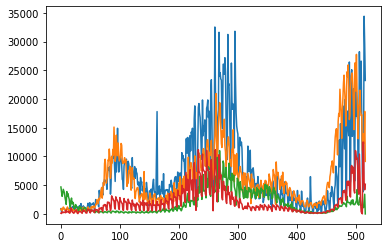

In [27]:
import matplotlib.pyplot as ply
ply.plot(stateCases('TX')[0])
ply.plot(stateCases('FL')[0])
ply.plot(stateCases('NY')[0])
ply.plot(stateCases('TN')[0])
# Add ma

# Multivariate Curve Fitting

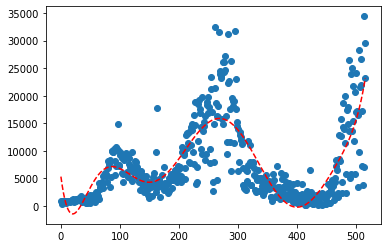

y = -816.34809 * x + 32.02925 * x^2 + -0.47011 *x^3 +0.00341 * x^4 + -0.00001 * x^5 +  0.00000 *x^6 +-0.00000 * x^7 + 0.00000 * x^8 + 5326.09989 


In [58]:
from scipy.optimize import curve_fit
from numpy import arange 
def objective(x, a, b, c,d,e,f,g,h,i):
	return a * x + b * x**2 + c*x**3 +d*x**4 +e*x**5 +f*x**6 +g*x**7+h*x**8 +i
y = stateCases('TX')[0] 
x = stateCases('TX')[1] 

popt, _ = curve_fit(objective, x, y)
a,b,c,d,e,f,g,h,i = popt
ply.scatter(x, y)
x_line = arange(min(x), max(x), .01)
y_line = objective(x_line, a, b, c,d,e,f,g,h,i)
ply.plot(x_line, y_line, '--', color='red')
ply.show()
print('y = %.5f * x + %.5f * x^2 + %.5f *x^3 +%.5f * x^4 + %.5f * x^5 +  %.5f *x^6 +%.5f * x^7 + %.5f * x^8 + %.5f '  % (a, b, c,d,e,f,g,h,i))